# データの前処理
- 機械学習が行えるようになるためにデータを整形すること
    1. **欠損値の補完**　…　データが欠けた部分(欠損値)を他の値で置き換える
    1. **ラベル、特徴量のエンコーディング**　…　特徴量を処理しやすい数値データに置き換える 
    1. **特徴量のスケーリング**　…　特徴量の尺度を揃える処理

## 1.欠損値の補完
- 欠損しているデータを補完する
- SimpleImputerクラスを利用
- インスタンス生成時に、stragegyで補完方法を指定する
- **most_frequent** … 最頻値での補完
- **median** … 中間値での補完
- **mean** … 平均値での補完 

### sample1
- 欠損値のあるデータの生成
- np.nan … 欠損値
- NaN … Not a Numberの略

In [1]:
import numpy as np
import pandas as pd

# 欠損値（np.nan）持つサンプルのデータセットを用意
df = pd.DataFrame({
    '社員番号':['K001','K002','K003','K004','K005','K006'],
    '性別':['F','M',np.nan,'F','M','M'],
    '年齢':[np.nan,35,42,50,np.nan,28],
    '収入':[350,400,800,760,540,np.nan],
    '出身':['東京','大阪','東京','東京','神奈川','大阪']
})

## sample2

In [ ]:
df

社員番号   性別    年齢     収入   出身
0  K001    F   NaN  350.0   東京
1  K002    M  35.0  400.0   大阪
2  K003  NaN  42.0  800.0   東京
3  K004    F  50.0  760.0   東京
4  K005    M   NaN  540.0  神奈川
5  K006    M  28.0    NaN   大阪

### sample3
- isna() … Not A Numberかどうかを確認
- Trueならば欠損値

In [ ]:
# 各要素が欠損値かどうかを確認する
df.isna()

### sample4
- 具体的な欠損値の確認
- どの列に何個欠損値があるかを調べる
- .isna().sum()で合計を求めることができる

In [4]:
# 具体的な欠損値の確認（年齢の欠損がなくなる）
df.isna().sum()

社員番号    0
性別      1
年齢      2
収入      1
出身      0
dtype: int64

### sample5
- 性別を最頻値を用いて分析するためにデータの詳細を調べる
- count … 全データの数
- unique … データの種類（'M','F'）
- top … 最頻値
- freq … 最頻値の頻度（出現回数）

In [5]:
# 性別の詳細情報を取得し、最頻値を取得
df['性別'].describe()

count     5
unique    2
top       M
freq      3
Name: 性別, dtype: object

### sample6
- 性別が欠けている行の確認

In [6]:
# 性別が欠けているデータを取得
df[df['性別'].isna()]

社員番号   性別    年齢     収入  出身
2  K003  NaN  42.0  800.0  東京

### sample7
- 欠損値を最頻値で補完
- SimpleImputerのstrategyに「most_frequent」を指定
- 欠損値の部分が最頻値に置き換わっていることを確認

In [7]:
# SimpleImputerのインポート
from sklearn.impute import SimpleImputer

# 「性別」の欠損値を最頻値で埋める
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df2 = df.copy()
df2['性別'] = most_frequent_imputer.fit_transform(df[['性別']])
# 性別が欠けていた2つのデータを取得（最頻値であるMに変化）
df2[df['性別'].isna()]

社員番号 性別    年齢     収入  出身
2  K003  M  42.0  800.0  東京

### sample8
- 性別から欠損値が消えたことを確認
- 年齢と収入にはまだ欠損値が残っている

In [8]:
df2

社員番号 性別    年齢     収入   出身
0  K001  F   NaN  350.0   東京
1  K002  M  35.0  400.0   大阪
2  K003  M  42.0  800.0   東京
3  K004  F  50.0  760.0   東京
4  K005  M   NaN  540.0  神奈川
5  K006  M  28.0    NaN   大阪

### sample9
- 年齢が欠損している行の確認

In [9]:
# 年齢が欠けているデータを取得
df[df['年齢'].isna()]

社員番号 性別  年齢     収入   出身
0  K001  F NaN  350.0   東京
4  K005  M NaN  540.0  神奈川

### sample10
- 年齢の欠損値を中央値で埋める
- SimpleImputerのstrategyを「median」で指定

In [10]:
# 「年齢」の欠損値を中央値で埋める
median_imputer = SimpleImputer(strategy='median')
df2['年齢'] = median_imputer.fit_transform(df[['年齢']])
# embarkedが欠けていた2つのデータを取得（最頻値であるSに変化）
df2[df['年齢'].isna()]

社員番号 性別    年齢     収入   出身
0  K001  F  38.5  350.0   東京
4  K005  M  38.5  540.0  神奈川

### sample11
- 収入の欠損している行を確認

In [11]:
df[df['収入'].isna()]

社員番号 性別    年齢  収入  出身
5  K006  M  28.0 NaN  大阪

### sample12
- 収入の欠損値を中央値で埋める
- SimpleImputerのstrategyを「mean」で指定

In [12]:
# 「収入」の欠損値を平均値で埋める
mean_imputer = SimpleImputer(strategy='mean')
df2['収入'] = mean_imputer.fit_transform(df[['収入']])
# embarkedが欠けていた2つのデータを取得（最頻値であるSに変化）
df2[df['収入'].isna()]

社員番号 性別    年齢     収入  出身
5  K006  M  28.0  570.0  大阪

## 2.ラベル・特徴量のエンコーディング
- **カテゴリデータ**を**数値特徴量**に変換し扱いやすくする
- **数値特徴量**　…　数値で表された特徴量
- **カテゴリデータ**　…　文字列で表されたデータ
    - **ラベルエンコーディング** … カテゴリデータを数値にエンコードすること
    - **One-hotエンコーディング** … 一致した列には1それ以外には0を当てはめる変換方法
    - **カウントエンコーディング** … そのカテゴリが出現した回数を割り当てる

### sample13
- 欠損値処理後のデータの確認

In [13]:
df2

社員番号 性別    年齢     収入   出身
0  K001  F  38.5  350.0   東京
1  K002  M  35.0  400.0   大阪
2  K003  M  42.0  800.0   東京
3  K004  F  50.0  760.0   東京
4  K005  M  38.5  540.0  神奈川
5  K006  M  28.0  570.0   大阪

### sample14
- ラベルエンコーディング
- LabelEncoderクラスを利用
- fit_transformで指定の列を変換

In [14]:
# ラベルエンコーディング（LabelEncoder）
from sklearn.preprocessing import LabelEncoder
# LabelEncoderクラスのインスタンス生成
le = LabelEncoder()
# 「性別」の列を変換
encoded = le.fit_transform(df2['性別'].values)

### sample15
- ラベルエンコーディングの結果に「性別」の列を入れ替える

In [15]:
# df2のコピーであるdf3を作る
df3 = df2.copy()
# df3にエンコード後の値を代入
df3['性別'] = encoded
df3

社員番号  性別    年齢     収入   出身
0  K001   0  38.5  350.0   東京
1  K002   1  35.0  400.0   大阪
2  K003   1  42.0  800.0   東京
3  K004   0  50.0  760.0   東京
4  K005   1  38.5  540.0  神奈川
5  K006   1  28.0  570.0   大阪

### sample16
- One-hotエンコーディング
- 「性別」を[1,0]もしくは[0,1]に分類
- [1,0]　…　F
- [0,1]　…　M
- sparseパラメータ … transform、fit_transformの実行結果の型を指定する
       - false … numpyのデータとして結果を取得

In [16]:
# One-hotエンコーディング（OneHotEncoder）
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoderクラスのインスタンス生成
ohe = OneHotEncoder(sparse=False)
# 「性別」の列を変換
encoded = ohe.fit_transform(df2[['性別']].values)
encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

### sample17
- ラベル変換後の列名を得る
- One-hotエンコーディングでは、データの種類の数だけ列が増える

In [17]:
# 列名を取得
label = ohe.get_feature_names(['性別'])
label

array(['性別_F', '性別_M'], dtype=object)

### sample18
- One-Hotエンコーディングによる列の入れ替え
- もともとの「性別」の列を削除し、新たにOne-Hotエンコーディングで得られた列を追加する

In [18]:
# df2のコピーをdf4にコピー
df4 = df2.copy()
# 「性別」の列を削除
df4 = df4.drop('性別', axis=1)
# 新たな列を追加する（エンコードした列は転置して追加）
df4[label[0]] = encoded.T[0]
df4[label[1]] = encoded.T[1]
df4

社員番号    年齢     収入   出身  性別_F  性別_M
0  K001  38.5  350.0   東京   1.0   0.0
1  K002  35.0  400.0   大阪   0.0   1.0
2  K003  42.0  800.0   東京   0.0   1.0
3  K004  50.0  760.0   東京   1.0   0.0
4  K005  38.5  540.0  神奈川   0.0   1.0
5  K006  28.0  570.0   大阪   0.0   1.0

### sample19
- カウントエンコーディング
- Counterクラスを用いて、各パラメータの出現頻度を調べる
- most_commonメソッドを使い、結果を辞書にまとめる
- { ラベル名:出現回数,ラベル名:出現回数,　… }

In [19]:
# df2のコピーをdf4にコピー
df5 = df4.copy()

# カウントエンコーディング
import collections
# 出身の列のラベルをカウントする
counter = collections.Counter(df4['出身'].values)
# カウント結果を列にまとめる
count_dict = dict(counter.most_common())
count_dict

{'東京': 3, '大阪': 2, '神奈川': 1}

### sample20
- 出身の列を数値に置き換える

In [20]:
encoded = df4['出身'].map(lambda x: count_dict[x]).values
encoded

array([3, 2, 3, 3, 1, 2], dtype=int64)

### sample21
- 「出身」の列を入れ替える

In [21]:
df5['出身'] = encoded
df5

社員番号    年齢     収入  出身  性別_F  性別_M
0  K001  38.5  350.0   3   1.0   0.0
1  K002  35.0  400.0   2   0.0   1.0
2  K003  42.0  800.0   3   0.0   1.0
3  K004  50.0  760.0   3   1.0   0.0
4  K005  38.5  540.0   1   0.0   1.0
5  K006  28.0  570.0   2   0.0   1.0

## 3.特徴量スケーリング
- **正規化（せいきか）**　…　データの最大値と最小値を制限する変換（最大値:1 最小値:0 の場合が多い）
- **標準化（ひょうじゅんか）** … データの平均値と分散で変換する操作（平均値を0, 分散を1とすることが多い）

### 正規化の式
$$
X' = \frac{X-x_{\min}}{x_{\max}-x_{\min}}
$$

$X$ … 正規化前の説明変数  
$X'$ … 正規化後の説明変数  
$x_{\max}$ … 説明変数の最大値  
$x_{\min}$ … 説明変数の最小値  

### 標準化の式

$$
X' = \frac{X-\mu}{\sigma} 
$$

$X$ … 標準化前の説明変数  
$X'$ … 標準化後の説明変数  
$\mu$ … 説明変数の平均値  
$\sigma$ … 説明変数の標準偏差  


### sample22
- numpyとmatplotlibのインポート

In [22]:
# numpyのインポート
import numpy as np
# matplotlibのインポート
import matplotlib.pyplot as plt

### sample23
- irisのデータの読み取り

In [23]:
#データの準備
from sklearn import datasets
dataset = datasets.load_iris()
 
#データの整理
target_names = dataset.target_names #ターゲット(花の種類)の名前リスト
targets = dataset.target #ターゲットに与えられた番号
feature_names = dataset.feature_names #特徴名リスト
features = dataset.data #各特徴のデータ

### sample24
- irisのデータをpandasに変換

In [24]:
import pandas as pd
from pandas import DataFrame
df = DataFrame(features, columns = feature_names)
df['target'] = target_names[targets]
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### sample25
- irisのデータを4次元グラフに表現

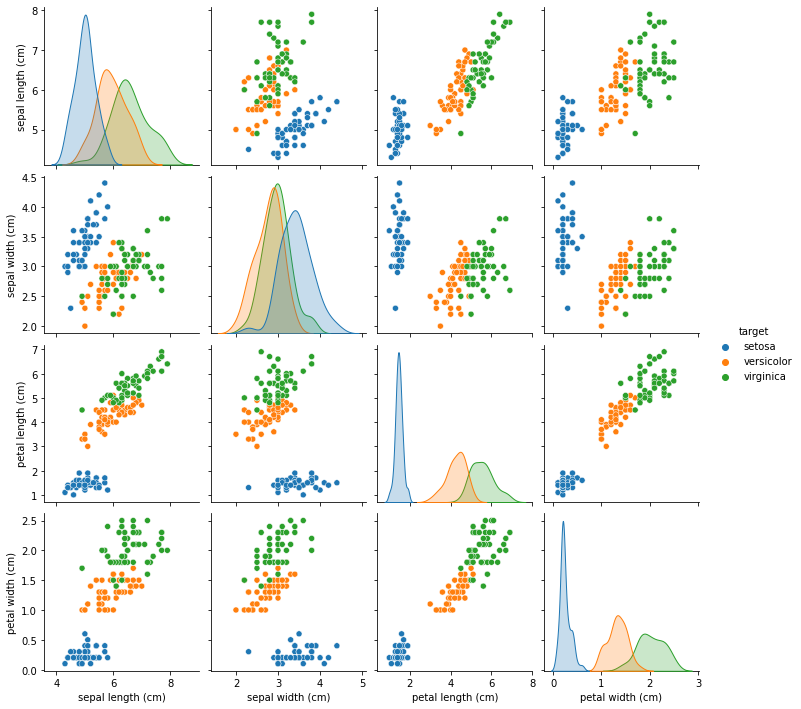

In [25]:
#　4次元を表すグラフ
import seaborn as sns
sns.pairplot(df, hue='target')
plt.show()

### sample26
- irisの説明変数を正規化
- MinMaxScalerクラスを利用
- fitで変換

In [26]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(features)
features_minmax = sc.transform(features)
features_minmax

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### sample27
- 正規化したデータを表示

In [27]:
df3 = DataFrame(features_minmax, columns = feature_names)
df3['target'] = target_names[targets]
df3.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### sample28
- 正規化したデータの表示
- 形状はそのままでスケール変化がなされている

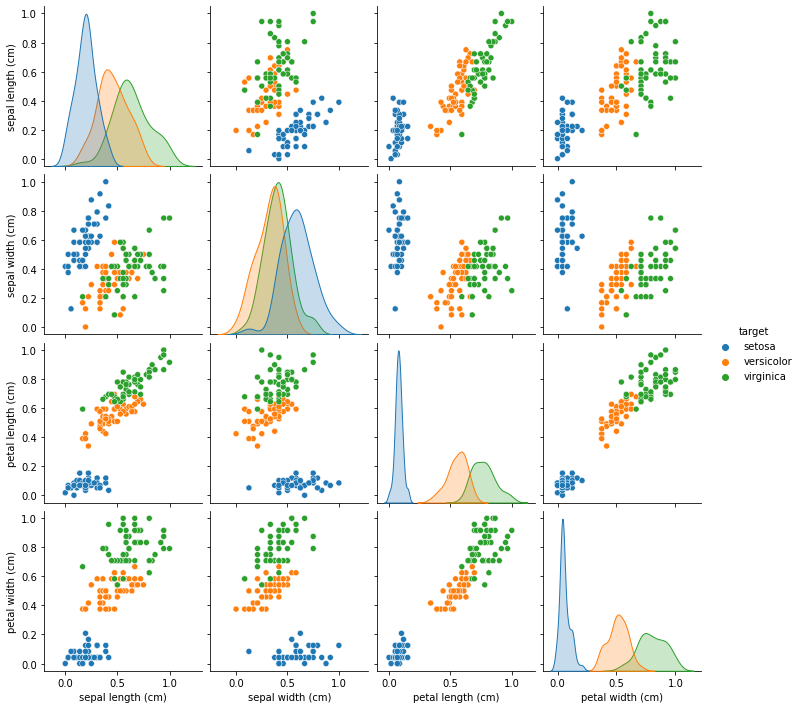

In [28]:
#　4次元を表すグラフ
import seaborn as sns
sns.pairplot(df3, hue='target')
plt.show()

### sample29
- irisの説明変数を標準化
- StandardScalerクラスを利用
- fitで変換

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(features)
features_std = sc.transform(features)
features_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### sample30
- 標準化したデータを表示

In [30]:
df2 = DataFrame(features_std, columns = feature_names)
df2['target'] = target_names[targets]
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

### sample31
- 標準化したデータの表示
- 形状はそのままでスケール変化がなされている

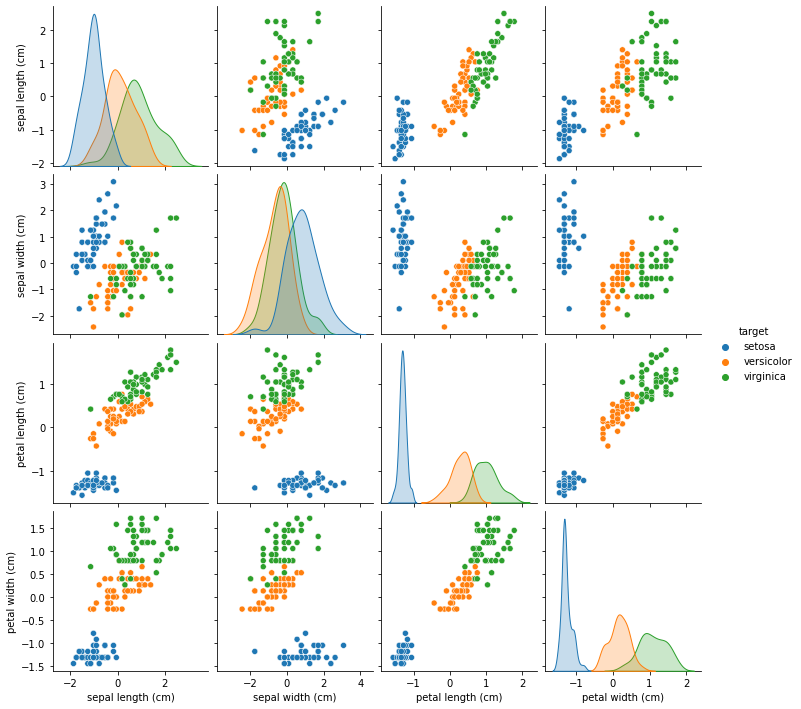

In [31]:
#　4次元を表すグラフ
import seaborn as sns
sns.pairplot(df2, hue='target')
plt.show()